In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\shopwise.csv")
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.nunique())

   Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0    15.0             29.0                         4  Laptop & Accessory   
1     7.0             25.0                         4              Mobile   
2    27.0             13.0                         3  Laptop & Accessory   
3    20.0             25.0                         4             Fashion   
4    30.0             15.0                         4              Others   

   SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                  3        Single                2         0   
1                  1       Married                2         0   
2                  1       Married                5         0   
3                  3      Divorced                7         0   
4                  4        Single                8         0   

   DaySinceLastOrder  CashbackAmount  
0                7.0             143  
1                7.0             129  
2                7.0             16

<span>  
    <h1>Dataset Overview</h1>  
    <p>The dataset has 499 rows and 11 columns.</p>  
    <p>Several columns (e.g., Tenure, WarehouseToHome, DaySinceLastOrder) have missing values.</p>  
    <p>The dataset includes categorical (PreferedOrderCat, MaritalStatus) and numerical columns.</p>  
    <h2>Interpretation</h2>  
    <p>This cell helps understand the structure, completeness, and distribution of the data.</p>  
    <p>It provides a foundation for further cleaning and analysis.</p>  
</span>


In [3]:
# Check for missing values in the dataset
# Impute missing values with the mean for numerical columns and mode for categorical columns

print(df.isnull().sum())
print(df.isnull().mean()*100)
for col in df.columns :
    if(df[col].dtype=="object"):
        df[col].fillna(df[col].mode()[0],inplace=True)
    else : 
        df[col].fillna(df[col].median(),inplace=True)
print(df.isnull().sum())

Tenure                      26
WarehouseToHome             26
NumberOfDeviceRegistered     0
PreferedOrderCat             0
SatisfactionScore            0
MaritalStatus                0
NumberOfAddress              0
Complain                     0
DaySinceLastOrder           37
CashbackAmount               0
dtype: int64
Tenure                      5.210421
WarehouseToHome             5.210421
NumberOfDeviceRegistered    0.000000
PreferedOrderCat            0.000000
SatisfactionScore           0.000000
MaritalStatus               0.000000
NumberOfAddress             0.000000
Complain                    0.000000
DaySinceLastOrder           7.414830
CashbackAmount              0.000000
dtype: float64
Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount        

C:\Users\HP\AppData\Local\Temp\ipykernel_7404\1597453649.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_7404\1597453649.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

<h1>Interpretation:</h1>  
<ul>  
    <li>Ensure that no missing values remain after the imputation process.</li>  
    <li>Helps to confirm that the missing values were handled properly.</li>  
</ul>


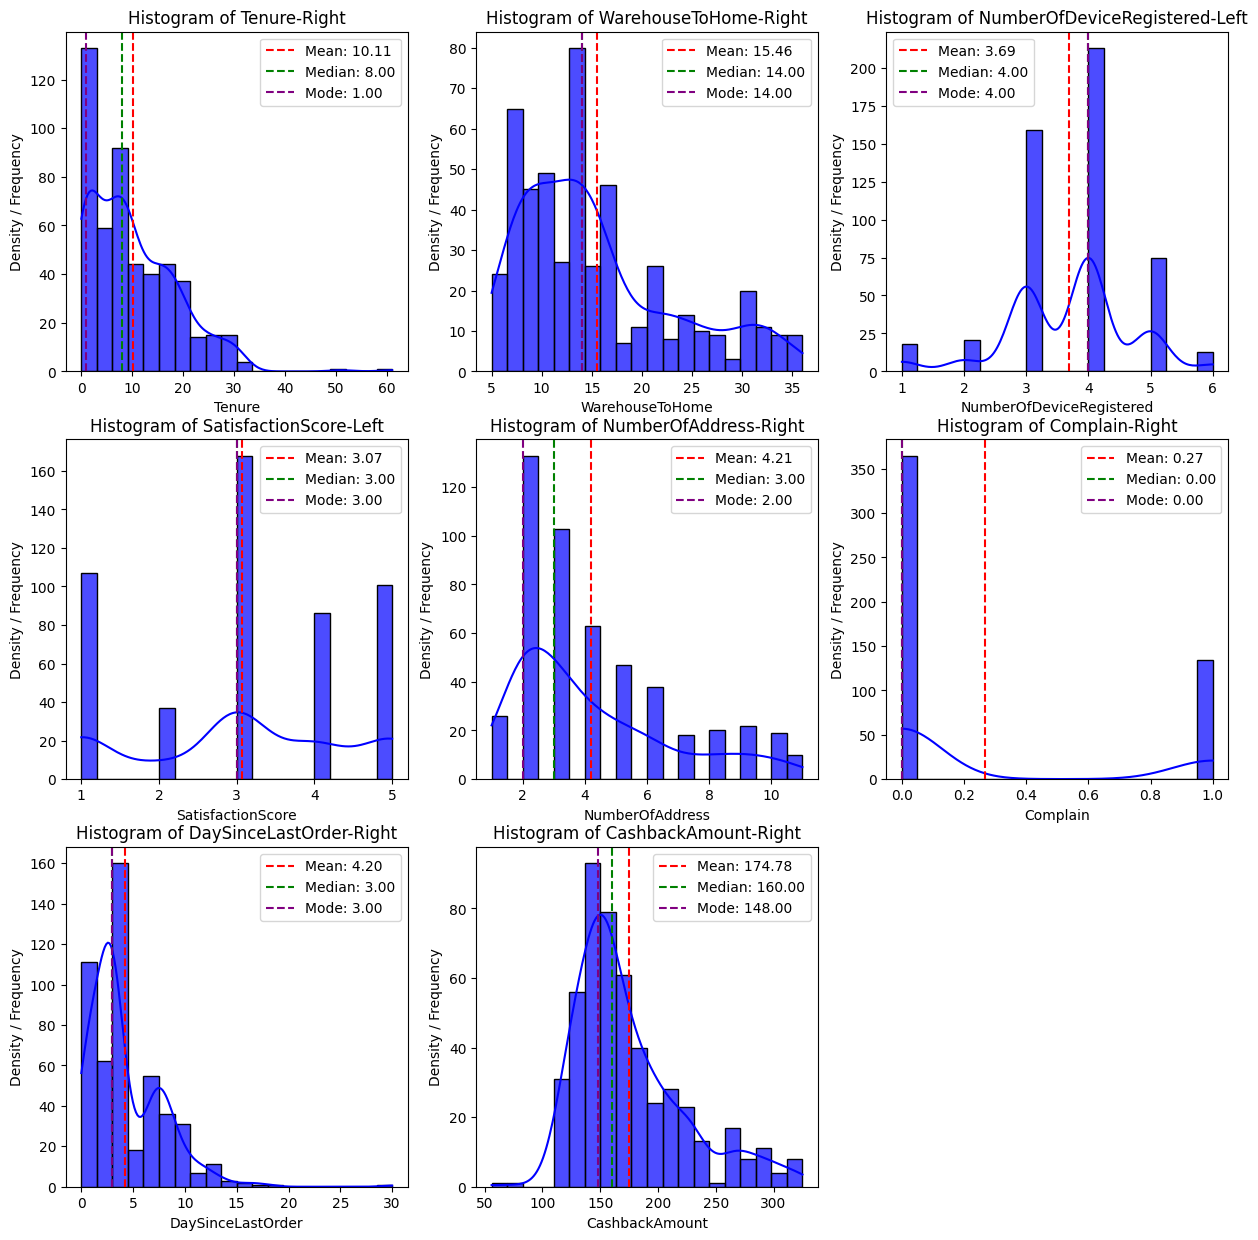

In [4]:
# Univariate Analysis : Plot histograms and check skewness for all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)
cols = min(len(numerical_columns), 3)

plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(numerical_columns, 1):
    # Mean, Median, and Skewness Calculation
    mean = df[col].mean()
    median = df[col].median()
    skewness = df[col].skew()

    # Determine skewness type
    if skewness > 0:
        skew='Right'
    elif skewness < 0:
        skew='Left'
    else:
        skew='No skew'

    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.7)
    
    # Add mean, median, and mode lines
    mode_val = df[col].mode()[0]
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='--', label=f'Mode: {mode_val:.2f}')
    
    # Titles and labels
    plt.title(f"Histogram of {col}-{skew}")
    plt.xlabel(col)
    plt.ylabel("Density / Frequency")
    plt.legend()



<h1>Interpretation:</h1>  
<p>Most columns exhibit right skew, indicating the presence of a few outliers or extreme values.</p>  
<p>Columns like <b>NumberOfDeviceRegistered</b> and <b>SatisfactionScore</b> are less skewed, suggesting more balanced distributions.</p>  
<p>Outliers in <b>CashbackAmount</b>, <b>Churn</b>, and <b>NumberOfDeviceRegistered</b> could represent important anomalies or unique customer behaviors worth investigating further.</p>  


C:\Users\HP\AppData\Local\Temp\ipykernel_7404\2695845558.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_7404\2695845558.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')


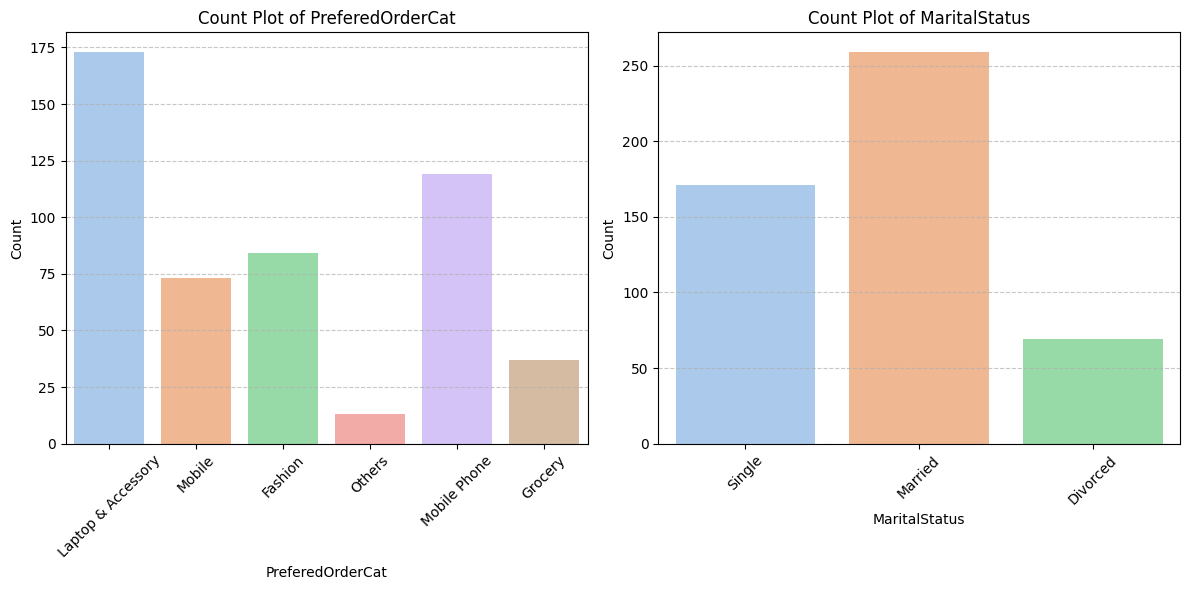

In [5]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plotting count plots for all categorical columns in one figure
plt.figure(figsize=(12, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)  # Adjust the layout for two categorical columns
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f"Count Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


<h1>PreferedOrderCat:</h1>  
<ul>  
    <li>The most common category is <b>Laptop & Accessory</b>.</li>  
    <li>Categories such as <b>Mobile</b> and <b>Fashion</b> are also popular.</li>  
    <li>Other categories have relatively lower counts, indicating less preference among users.</li>  
</ul>  

<h1>MaritalStatus:</h1>  
<ul>  
    <li>The majority of the customers are <b>Married</b>.</li>  
    <li><b>Single</b> is the second most common status.</li>  
    <li><b>Divorced</b> has the lowest count, suggesting fewer customers in this group.</li>  
</ul>


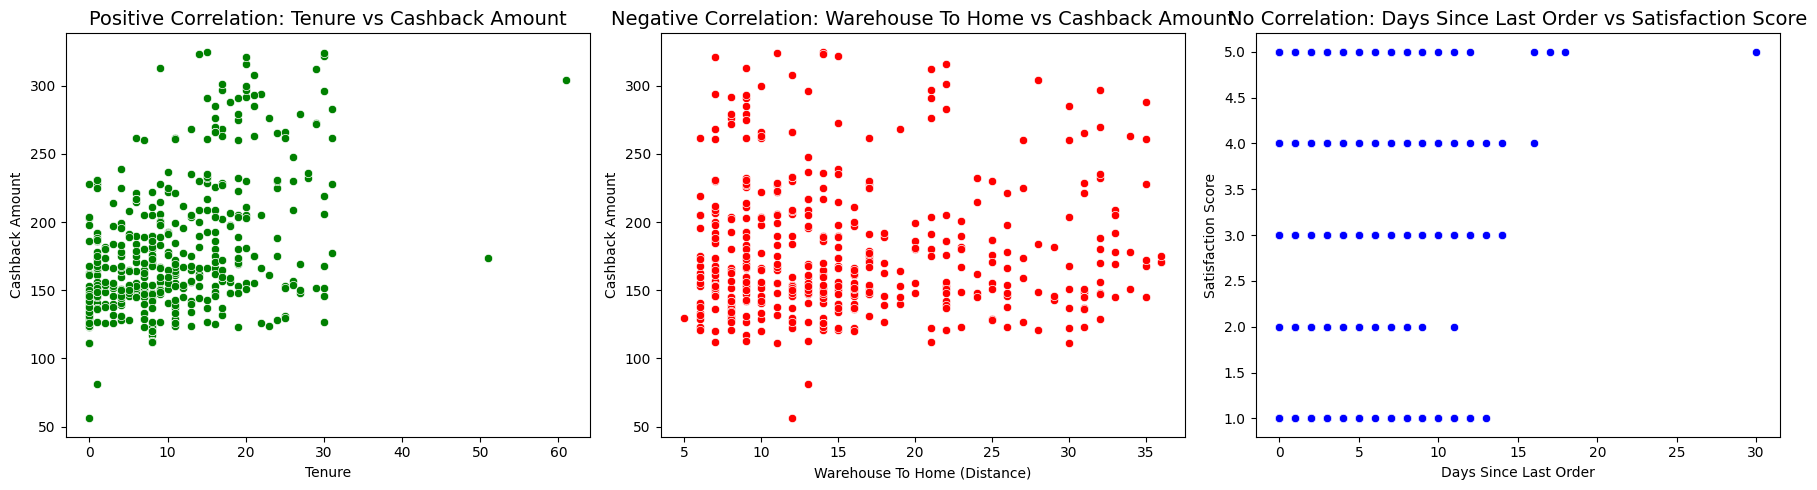

In [6]:
# Displaying the scatter plots to identify correlations in the dataset
plt.figure(figsize=(18, 5))

# Positive Correlation example: CashbackAmount vs. Tenure
plt.subplot(1, 3, 1)
sns.scatterplot(x='Tenure', y='CashbackAmount', data=df, color='green')
plt.title('Positive Correlation: Tenure vs Cashback Amount', fontsize=14)
plt.xlabel('Tenure')
plt.ylabel('Cashback Amount')

# Negative Correlation example: WarehouseToHome vs. CashbackAmount
plt.subplot(1, 3, 2)
sns.scatterplot(x='WarehouseToHome', y='CashbackAmount', data=df, color='red')
plt.title('Negative Correlation: Warehouse To Home vs Cashback Amount', fontsize=14)
plt.xlabel('Warehouse To Home (Distance)')
plt.ylabel('Cashback Amount')

# No Correlation example: DaySinceLastOrder vs. SatisfactionScore
plt.subplot(1, 3, 3)
sns.scatterplot(x='DaySinceLastOrder', y='SatisfactionScore', data=df, color='blue')
plt.title('No Correlation: Days Since Last Order vs Satisfaction Score', fontsize=14)
plt.xlabel('Days Since Last Order')
plt.ylabel('Satisfaction Score')

plt.tight_layout()
plt.show()

<h1>Correlation Analysis</h1>  

<h2>Positive Correlation: Tenure vs Cashback Amount</h2>  
<ul>  
    <li>As the <b>Tenure</b> increases, the <b>Cashback Amount</b> generally increases.</li>  
    <li>This indicates a positive relationship where customers with longer tenure receive higher cashback amounts.</li>  
</ul>  

<h2>Negative Correlation: Warehouse To Home vs Cashback Amount</h2>  
<ul>  
    <li>As the distance (<b>WarehouseToHome</b>) increases, the <b>Cashback Amount</b> decreases.</li>  
    <li>This suggests that customers closer to the warehouse tend to receive higher cashback amounts, possibly due to cost savings.</li>  
</ul>  

<h2>No Correlation: Days Since Last Order vs Satisfaction Score</h2>  
<ul>  
    <li>There is no clear trend between <b>DaySinceLastOrder</b> and <b>Satisfaction Score</b>.</li>  
    <li>The satisfaction score does not appear to depend on the number of days since the last order.</li>  
</ul>


C:\Users\HP\AppData\Local\Temp\ipykernel_7404\1473455543.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tenure'])


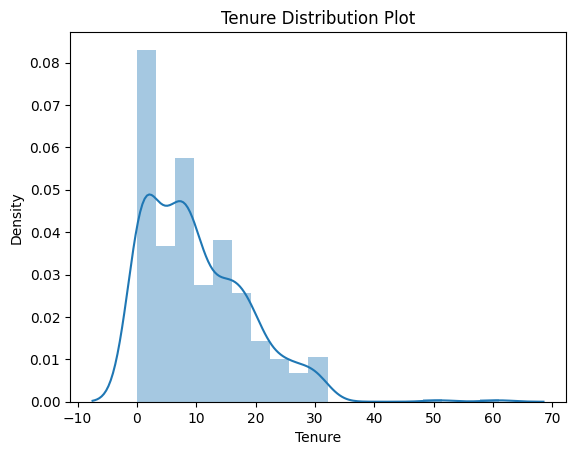

In [7]:
# Data distribution
plt.title('Tenure Distribution Plot')
sns.distplot(df['Tenure'])
plt.show()

<h1>Tenure Distribution Interpretation</h1>  

<ul>  
    <li>The tenure distribution is right-skewed, indicating that most customers have a shorter tenure.</li>  
    <li>A significant number of customers have tenure values close to zero, while fewer have higher tenure values.</li>  
    <li>The presence of a long tail suggests that some customers have been associated for a much longer time.</li>  
    <li>Negative or unrealistic values (if any) should be investigated and cleaned.</li>  
</ul>  


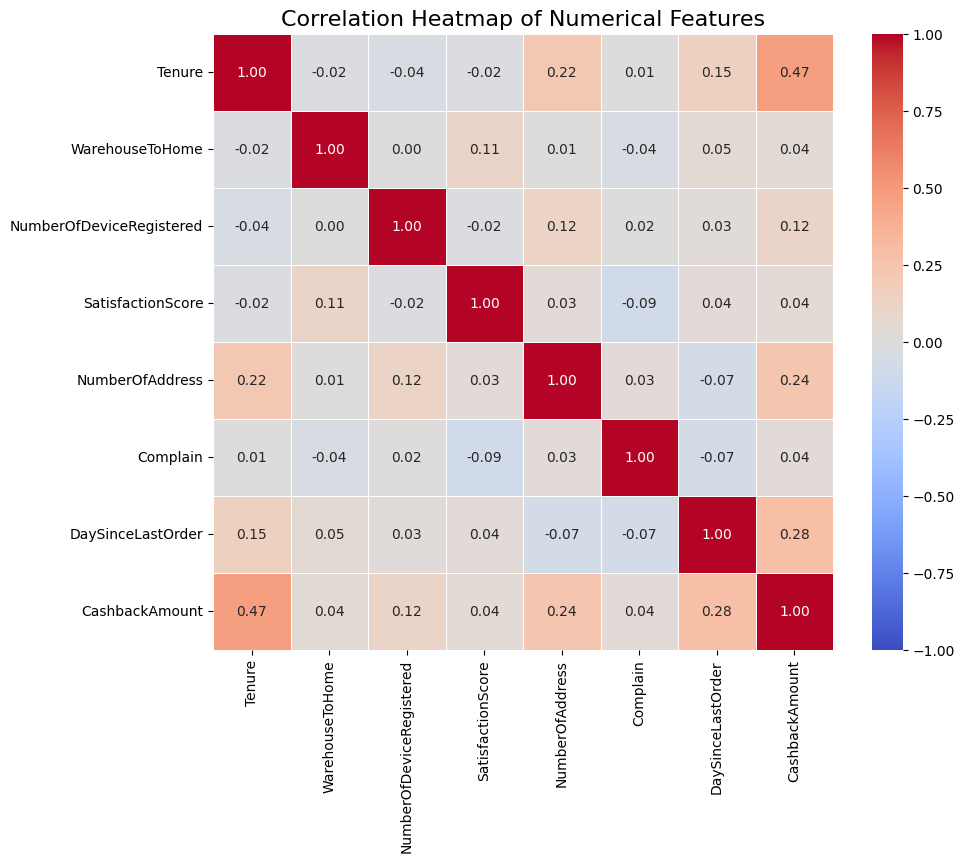

In [8]:
# Generating the correlation heatmap for numerical columns in the dataset
import numpy as np

# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()



<h1>Correlation Analysis</h1>  

<h2>Strong Correlations:</h2>  
<ul>  
    <li><b>Tenure and CashbackAmount (0.47):</b> Indicates a moderate positive relationship, suggesting that customers with higher tenure are likely to receive more cashback.</li>  
    <li><b>Tenure and Churn (-0.36):</b> Indicates a moderate negative relationship, meaning that customers with longer tenure are less likely to churn.</li>  
</ul>  

<h2>Weak to No Significant Correlations:</h2>  
<ul>  
    <li>Most other pairs, such as <b>WarehouseToHome and CashbackAmount (0.04)</b> or <b>SatisfactionScore and Churn (0.11)</b>, show weak correlations, suggesting minimal or no linear relationships.</li>  
</ul>  

<h2>Interesting Observations:</h2>  
<ul>  
    <li><b>NumberOfAddress</b> has a small positive correlation with <b>CashbackAmount (0.24)</b>, possibly suggesting that customers with multiple addresses receive slightly higher cashback.</li>  
    <li><b>DaySinceLastOrder and CashbackAmount (0.28)</b> show a weak positive correlation, hinting that more time since the last order might result in higher cashback.</li>  
</ul>  


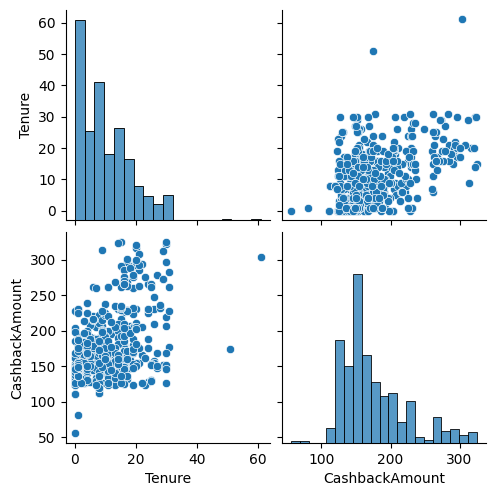

In [9]:
sns.pairplot(df, vars = ['Tenure', 'CashbackAmount'])

<h1>Pair Plot Analysis: Tenure vs Cashback Amount</h1>

<h2>Observations:</h2>

<ul>
    <li><b>Tenure Distribution:</b> The histogram for Tenure shows a right-skewed distribution, with most customers having a short tenure.</li>
    <li><b>Cashback Amount Distribution:</b> The Cashback Amount is also right-skewed, with a concentration around lower values and a few high-value outliers.</li>
    <li><b>Scatter Plot Insights:</b> 
        <ul>
            <li>There is a <b>moderate positive correlation</b> between Tenure and Cashback Amount, indicating that customers with longer tenure tend to receive more cashback.</li>
            <li>However, there are a few **outliers** with extremely high cashback amounts, which might need further investigation.</li>
            <li>The relationship appears somewhat scattered, suggesting that other factors may also influence cashback distribution.</li>
        </ul>
    </li>
</ul>


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize

# Selecting numerical features for clustering
features =  ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 
                  'SatisfactionScore', 'NumberOfAddress', 'Complain', 
                  'DaySinceLastOrder', 'CashbackAmount']
X = df[features]

<h1>Feature Selection for Clustering</h1>

<h2>Selected Numerical Features:</h2>

<ul>
    <li><b>Tenure:</b> Duration of the customer's association with the company.</li>
    <li><b>WarehouseToHome:</b> Distance between the warehouse and the customer’s home.</li>
    <li><b>NumberOfDeviceRegistered:</b> Total number of devices linked to the customer’s account.</li>
    <li><b>SatisfactionScore:</b> Customer's satisfaction rating.</li>
    <li><b>NumberOfAddress:</b> Count of addresses registered by the customer.</li>
    <li><b>Complain:</b> Indicates whether a complaint was registered (binary feature).</li>
    <li><b>DaySinceLastOrder:</b> Number of days since the customer’s last order.</li>
    <li><b>CashbackAmount:</b> Total cashback received by the customer.</li>
</ul>

In [11]:
# Split the data (only X) into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Training set shape: (334, 8)
Testing set shape: (165, 8)


In [12]:
# APPROACH 1: Start with an assumed number of clusters (k=3)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate the silhouette score for k=3
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"\nSilhouette Score for k={k}: {sil_score:.4f}")


Silhouette Score for k=3: 0.1665


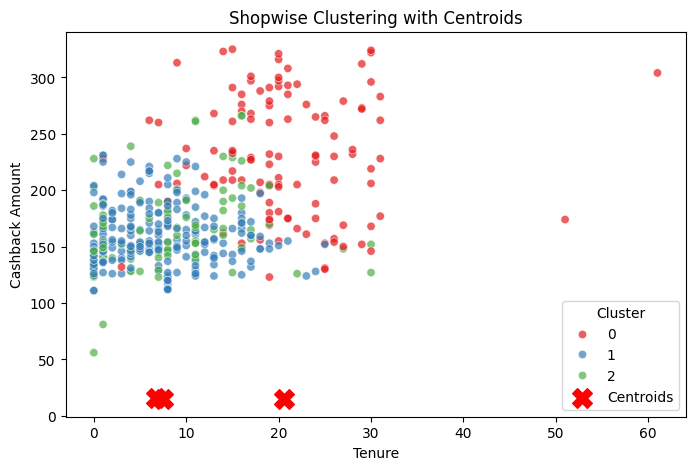

In [13]:

kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Get centroids (inverse transform to original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Scatter plot of clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Tenure'], y=df['CashbackAmount'], hue=df['Cluster'], palette='Set1', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label="Centroids")

# Labels and title
plt.xlabel("Tenure")
plt.ylabel("Cashback Amount")
plt.title("Shopwise Clustering with Centroids")
plt.legend(title="Cluster")
plt.show()

<h2>Interpretation of Assigning Random Value to K</h2>

<ul>
    <li>The scatter plot shows clustering based on <b>Tenure</b> (x-axis) and <b>Cashback Amount</b> (y-axis) using <b>K-Means</b>.</li>
    <li>Three clusters are represented:  
        <ul>
            <li><span style="color:red;">Cluster 0 (Red)</span></li>
            <li><span style="color:blue;">Cluster 1 (Blue)</span></li>
            <li><span style="color:green;">Cluster 2 (Green)</span></li>
        </ul>
    </li>
    <li><b>Centroids</b> (Large Red ‘X’) indicate cluster centers.</li>
    <li><b>Issue:</b> The centroids appear misplaced near the <b>x-axis</b>, meaning they do not accurately represent the true center of the data points due to K being set to 3 which is not Optimal</li>


In [14]:
kmeans.cluster_centers_

array([[ 1.21482103, -0.03525316,  0.07698753,  0.18346147,  0.57007056,
        -0.17798323,  0.60206931,  1.16118945],
       [-0.39609849,  0.05548009, -0.02009065, -0.01360752, -0.23195704,
        -0.605907  , -0.15643079, -0.40067967],
       [-0.29979062, -0.09772981, -0.03112489, -0.15708833, -0.02917704,
         1.65041831, -0.24506514, -0.23315881]])

In [15]:
kmeans.inertia_

3036.5262259605297

<h1>K-Means Clustering Algorithm</h1>

<h2>Overview:</h2>
<ul>
    <li>The K-Means algorithm clusters data by dividing it into <b>n groups</b> of equal variance.</li>
    <li>It minimizes a criterion known as <b>inertia</b> (or within-cluster sum of squares).</li>
</ul>

<h2>Key Concepts:</h2>
<ul>
    <li><b>Inertia:</b> Measures how internally coherent clusters are.</li>
    <li><b>Clusters (C):</b> The algorithm partitions a dataset of <b>N samples (X)</b> into <b>K disjoint clusters.</b></li>
    <li><b>Cluster Centroids:</b> Each cluster is represented by a mean (<b>j</b>) of the samples in that cluster.</li>
</ul>

<h2>Objective:</h2>
<ul>
    <li>The goal of K-Means is to select centroids that <b>minimize the inertia</b>.</li>
    <li>Lower inertia values indicate more compact and well-separated clusters.</li>
</ul>


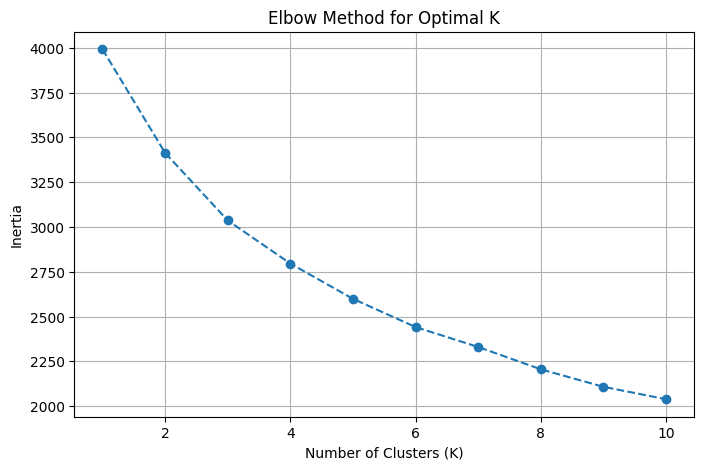

In [16]:
# Step 2: Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

<h1>Elbow Method for Optimal K</h1>

<p>The graph shows the relationship between the number of clusters (K) and inertia. As K increases, inertia decreases. The optimal K is at the "elbow point," where the rate of decrease slows significantly. Based on the graph, the optimal number of clusters appears to be <b>K = 3 or 4</b>.</p>


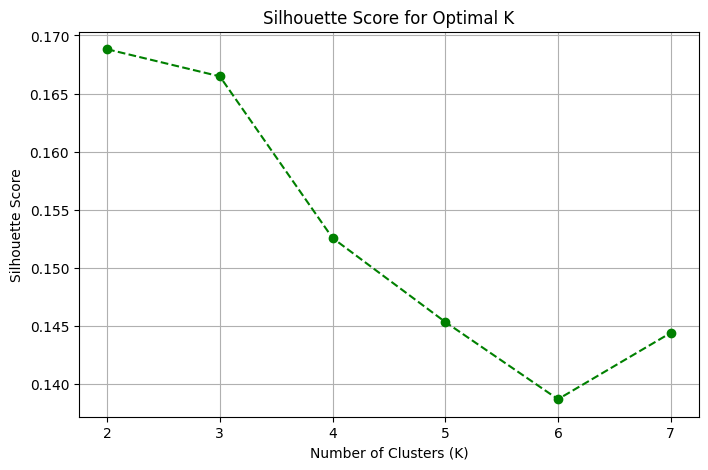

In [17]:
silhouette_scores = []
for k in range(2, 8):  # Testing K from 2 to 7
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 8), silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.grid()
plt.show()

<h1>Silhouette Score for Optimal K</h1>

<p>The graph shows how the silhouette score changes with different cluster values (K). The highest score is observed at <b>K = 2</b>, indicating the best clustering quality. As K increases, the silhouette score decreases, suggesting weaker clustering.</p>


In [18]:
best_k = range(2, 8)[np.argmax(silhouette_scores)]
print(f"Optimal Number of Clusters (K) = {best_k}")

Optimal Number of Clusters (K) = 2


In [19]:
# Calculate silhouette scores for different K values
silhouette_scores = {}
for k in range(2, 8):  # Testing K from 2 to 7
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores[k] = score

# Print silhouette scores for each K
print("Silhouette Scores for different K values:")
for k, score in silhouette_scores.items():
    print(f"K={k}: Silhouette Score = {score:.4f}")

Silhouette Scores for different K values:
K=2: Silhouette Score = 0.1688
K=3: Silhouette Score = 0.1665
K=4: Silhouette Score = 0.1526
K=5: Silhouette Score = 0.1453
K=6: Silhouette Score = 0.1387
K=7: Silhouette Score = 0.1444


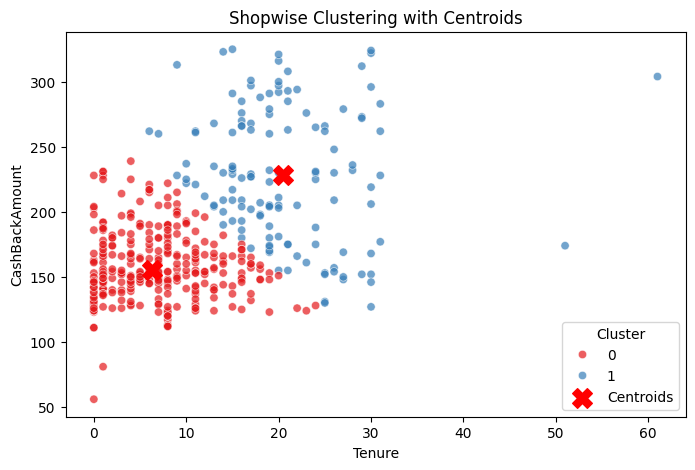

In [20]:
# Select features
df_short = df[['Tenure', 'CashbackAmount']]  # Modify based on dataset

# Handle NaN values (important for KMeans)
df_short = df_short.dropna()  # or use imputation if needed

# Scale data (optional, but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_short)

k = 2  # Adjust this based on silhouette or elbow method results
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Get centroids (inverse transform to original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Scatter plot of clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Tenure'], y=df['CashbackAmount'], hue=df['Cluster'], palette='Set1', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label="Centroids")

# Labels and title
plt.xlabel("Tenure")
plt.ylabel("CashBackAmount")
plt.title("Shopwise Clustering with Centroids")
plt.legend(title="Cluster")
plt.show()

<h2>Interpretation of the Shopwise Clustering with Centroids Plot according to Seloitte Score</h2>

<h3>2. Cluster Distribution</h3>
<ul>
    <li><b style="color:red;">Cluster 0 (Red Points):</b>
        <ul>
            <li>Contains data points with <b>low tenure</b> (closer to 0-15).</li>
            <li>Cashback amounts are mostly between <b>100 and 200</b>.</li>
            <li>This cluster is more densely packed on the left side of the plot.</li>
        </ul>
    </li>
    <li><b style="color:blue;">Cluster 1 (Blue Points):</b>
        <ul>
            <li>Represents data points with a <b>higher tenure</b> (spread beyond 10 and up to 60).</li>
            <li>Cashback amounts are more dispersed, reaching <b>over 300</b>.</li>
            <li>The points are more spread out and less dense compared to Cluster 0.</li>
        </ul>
    </li>
</ul>


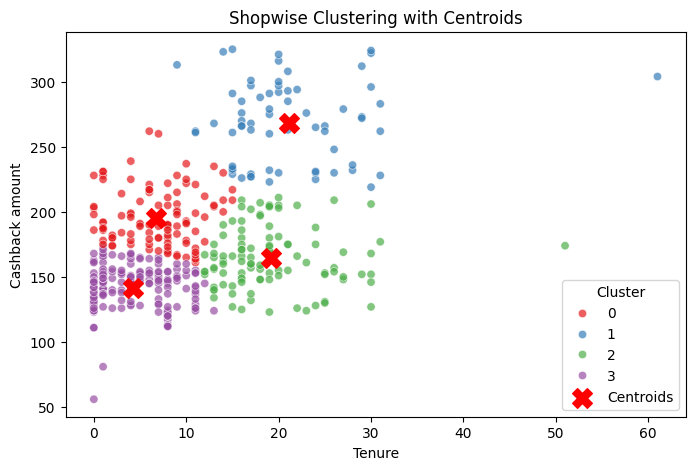

In [21]:
# Apply K-Means with optimal clusters
k = 4  # Adjust this based on silhouette or elbow method results
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Get centroids (inverse transform to original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Scatter plot of clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Tenure'], y=df['CashbackAmount'], hue=df['Cluster'], palette='Set1', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label="Centroids")

# Labels and title
plt.xlabel("Tenure")
plt.ylabel("Cashback amount")
plt.title("Shopwise Clustering with Centroids")
plt.legend(title="Cluster")
plt.show()

<h2>Interpretation of the Shopwise Clustering with Centroids Plot</h2>
<h3>2. Cluster Distribution</h3>
<ul>
    <li><b style="color:red;">Cluster 0 (Red):</b>
        <ul>
            <li>Primarily contains customers with <b>low tenure (0-15)</b>.</li>
            <li>Cashback amounts are mostly between <b>150 and 220</b>.</li>
        </ul>
    </li>
    <li><b style="color:blue;">Cluster 1 (Blue):</b>
        <ul>
            <li>Represents customers with a <b>higher tenure (10-50)</b>.</li>
            <li>Cashback amounts are more dispersed, going above <b>300</b>.</li>
        </ul>
    </li>
    <li><b style="color:green;">Cluster 2 (Green):</b>
        <ul>
            <li>Mostly falls in the <b>10-30 tenure range</b>.</li>
            <li>Cashback amounts range from <b>150 to 250</b>.</li>
        </ul>
    </li>
    <li><b style="color:purple;">Cluster 3 (Purple):</b>
        <ul>
            <li>Contains customers with <b>low tenure (0-10)</b> and relatively lower cashback amounts.</li>
            <li>Cashback mostly ranges from <b>100 to 170</b>.</li>
        </ul>
    </li>
</ul>


<h2>Comparison of Clustering Approaches</h2>
<h3>Clustering with K=2 (Silhouette Score)</h3>
        <p>
            The first scatter plot represents clustering with K=2, which was selected using the Silhouette Score.
            The data is divided into two main clusters, but there is some visible overlap, indicating that further 
            refinement might be needed. This approach provides a general segmentation but may miss finer sub-group distinctions.
        </p>        
<h3>Clustering with K=4 (Elbow Method)</h3>
        <p>
            The second scatter plot represents clustering with K=4, obtained using the Elbow Method.
            Here, we see a more detailed segmentation of the data, with additional centroids capturing different sub-groups.
            This approach better differentiates patterns within the dataset, reducing intra-cluster variance and improving classification.
        </p>
        
<h3>Final Interpretation</h3>
        <p>
            The comparison between K=2 and K=4 reveals that increasing the number of clusters provides a more granular segmentation,
            potentially leading to better insights. While K=2 offers a broad categorization, K=4 captures finer distinctions in the data.
            The choice between the two depends on the application – if a high-level division is sufficient, K=2 works, but for detailed
            segmentation, <b>K=4 is preferable<b>.
        </p>
